In [7]:
from DataLoader import Load_Labeling
from TopbioTesting import Topbio_test , Parameter_Model
import pandas as pd
import numpy as np

In [2]:
path = 'Data'
genome_list = ['LUAD', 'LUSC'] # cancer
df = Load_Labeling(path, genome_list)

cancer : LUAD
file : LUAD.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.data.txt
cancer : LUSC
file : LUSC.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.data.txt


In [3]:
ranking_df = pd.read_csv('ranking_df.csv',index_col=0)
ranking_df

,ranking_RF,ranking_EXT
?|100130426,2087,5128
?|100133144,2087,1946
?|100134869,2087,5128
?|10357,579,769
?|10431,2087,5128
...,...,...
ZYX|7791,2087,5128
ZZEF1|23140,2087,5128
ZZZ3|26009,2087,5128
psiTPTE22|387590,2087,4021


In [4]:
print( Parameter_Model(model_parameter = {'RF': "recommended"}) ) #옵션 default, recommended, 직접 입력
print( Parameter_Model(model_parameter = {'RF': "default"}) )
print( Parameter_Model(model_parameter = {'MLP': {'max_iter' : 300}}) )

(RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=16), 'RF')
(RandomForestClassifier(), 'RF')
(MLPClassifier(max_iter=300), 'MLP')


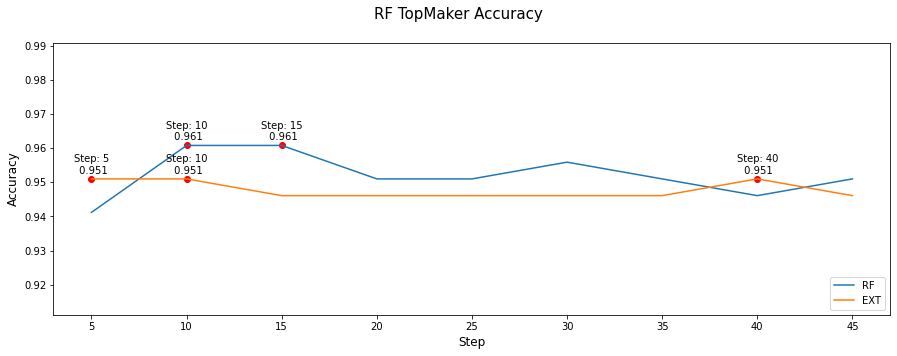

In [5]:
step_num = list(np.arange(5,50,5))
score_df = Topbio_test(df, ranking_df, ['RF','EXT'], step_num, model_parameter = {'RF': "default"})

In [6]:
score_df

,Step,EXT,RF
0,5,0.950980,0.941176
1,10,0.950980,0.960784
2,15,0.946078,0.960784
3,20,0.946078,0.950980
4,25,0.946078,0.950980
5,30,0.946078,0.955882
6,35,0.946078,0.950980
7,40,0.950980,0.946078
8,45,0.946078,0.950980


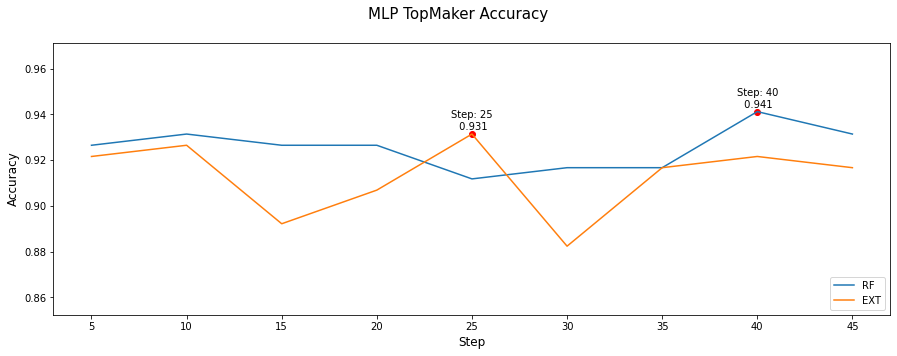

In [16]:
step_num = list(np.arange(5,50,5))
score_df = Topbio_test(df, ranking_df, ['RF','EXT'], step_num, model_parameter = {'MLP': "default"})

In [17]:
score_df

,Step,EXT,RF
0,5,0.921569,0.926471
1,10,0.926471,0.931373
2,15,0.892157,0.926471
3,20,0.906863,0.926471
4,25,0.931373,0.911765
5,30,0.882353,0.916667
6,35,0.916667,0.916667
7,40,0.921569,0.941176
8,45,0.916667,0.931373
